In [16]:
import sys
import cv2
import re
import csv
sys.path.append('..')

In [2]:
%matplotlib notebook

import math as m
import numpy as np
from scipy import ndimage

import matplotlib
import matplotlib.pyplot as plt

from core import Core

from global_var import COLORS


In [3]:
matplotlib.rc('font', family='serif') 
matplotlib.rc('font', serif='Palatino Linotype') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 20})

In [4]:
folder = r'C:\SPRUP_data_Jenda\2019_03_13_Jenda_microscopy\20_12_11_BC5/'.replace('\\', '/')

file = 'raw_02_1'


core = Core(folder, file)
core.downsample(5)
core.type = 'diff'
print(len(core))

99


In [5]:
# dir(core)

<IPython.core.display.Javascript object>


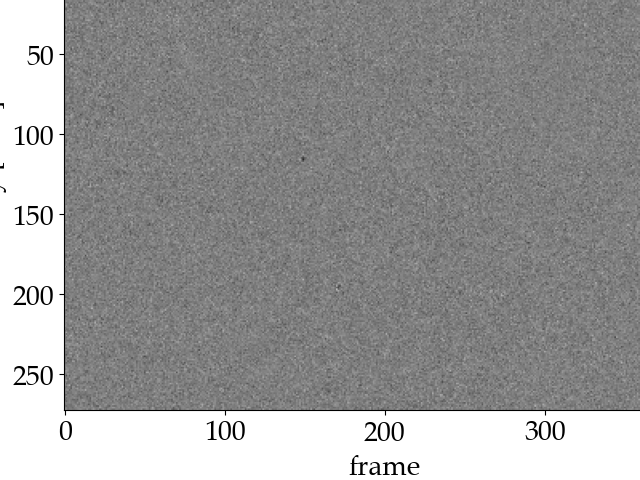

In [6]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 1])
axes.set_title(file)
axes.set_xlabel('frame')
axes.set_ylabel('intensity [a. u.]')


axes.imshow(
    core.frame(61),
    cmap='gray',
    zorder=0,
    vmin=core.range[0],
    vmax=core.range[1]
)
    


# fig.savefig('images/intensity_fluctiations_SLED.png', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')    


In [7]:
data = np.load(folder + 'saved_data/' + file + '.npy')
mask = data>0.1
data[mask] = 1
data = data.astype(int)

In [8]:
d = data[20:40,20:40,61]
print(d)

[[0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [10]:
for x in np.nditer(d, flags = ['external_loop'], order = 'C'):
    print(x)

[0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [149]:
labeled_data, num_features = ndimage.label(data, np.ones((3, 3, 3)))
# labeled_data, num_features = ndimage.label(data)
print(num_features)

778


In [14]:
x = np.linspace(0, 10, 21)
y = x**2

In [15]:
print(x)
print(y)

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10. ]
[  0.     0.25   1.     2.25   4.     6.25   9.    12.25  16.    20.25
  25.    30.25  36.    42.25  49.    56.25  64.    72.25  81.    90.25
 100.  ]


In [22]:
with open('file.csv', mode='w') as f:
    for i, j in zip(x, y):
        f.write('{}, {}\n'.format(i, j))
